In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import tensor

import polars as pl

import sklearn
from sklearn.model_selection import train_test_split, cross_validate

In [2]:
# 76a03c23b55d558aeda6c35781b8fda9aea7b652d4c4318c

### get course data sets, and save them to local parquet files

In [4]:
# url_stem = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/"

# data_sets = [
#     # 'bluebook-for-bulldozers.csv',
#     'car-sales-extended-missing-data.csv',
#     'car-sales-extended.csv',
#     'car-sales.csv',
#     'heart-disease.csv',
#     'dog-vision-full-model-predictions-with-mobilenetV2.csv',
#     # 'dog-vision-prediction-probabilities-array.csv',
#     'exported-car-sales.csv',
#     'exported-patient-data.csv'
# ]

# for data_set in data_sets:
#     url = f"{url_stem}{data_set}"
#     temp_df = pd.read_csv(url)
#     output_dataset_name = data_set.replace(".csv", ".parquet")
#     output_filename = f"./data/{output_dataset_name}"
#     print(f"Saving to {output_filename}")
#     temp_df.to_parquet(output_filename)

In [44]:
# car data
car_sales = pd.read_parquet('data/car-sales.parquet')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [46]:
# describe data
car_sales.columns = 'make color odometer doors price'.split()

for c in 'make color'.split():
    car_sales[c] = car_sales[c].astype('category')

car_sales['price'] = car_sales['price'].str.replace('$', '').str.replace(',','').str.replace('.00', '').astype(int)
car_sales.describe().round(2)

,odometer,doors,price
count,10.00,10.00,10.00
mean,78601.40,4.00,7645.00
std,61983.47,0.47,5379.41
min,11179.00,3.00,3500.00
25%,35836.25,4.00,4625.00
50%,57369.00,4.00,6625.00
75%,96384.50,4.00,7375.00
max,213095.00,5.00,22000.00


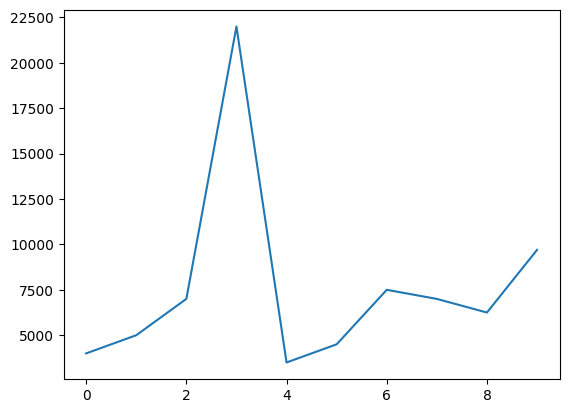

In [48]:
car_sales['price'].plot();

In [59]:
cars2 = pl.read_parquet('data/car-sales.parquet')
cars2 = \
cars2.select([
    pl.col('Make').str.to_lowercase().cast(pl.Categorical).alias('make'),
    pl.col('Colour').str.to_lowercase().cast(pl.Categorical).alias('color'),
    pl.col('Odometer (KM)').cast(pl.UInt32).alias('odometer'),
    pl.col('Doors').cast(pl.UInt8).alias('doors'),
    pl.col('Price').alias('price')
]).with_columns([
    pl.col('price').str.replace(r'[$,]', '').str.replace(",", "").cast(pl.Float32).cast(pl.UInt32),
])

In [76]:
# t = torch.from_numpy(\
cars2.filter(cars2['price'] > 4000).to_numpy()

# t

array([['honda', 'red', 87899, 4, 5000],
       ['toyota', 'blue', 32549, 3, 7000],
       ['bmw', 'black', 11179, 5, 22000],
       ['toyota', 'green', 99213, 4, 4500],
       ['honda', 'blue', 45698, 4, 7500],
       ['honda', 'blue', 54738, 4, 7000],
       ['toyota', 'white', 60000, 4, 6250],
       ['nissan', 'white', 31600, 4, 9700]], dtype=object)

### numpy section (I am using torch)

In [80]:
a1 = tensor([1,2,3])
a1

tensor([1, 2, 3])

In [81]:
a2 = tensor([[1, 2, 3.3], [4, 5, 6.5]])
a2

tensor([[1.0000, 2.0000, 3.3000],
        [4.0000, 5.0000, 6.5000]])

In [83]:
a3 = tensor([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]])
a3

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])

In [93]:
dir(torch)

['AVG',
 'AggregationType',
 'AliasDb',
 'Any',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'AwaitType',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CallStack',
 'Callable',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeserializationStorageContext',
 'DeviceObjType',
 'Dict',
 'DictType',
 'DisableTorchFunction',
 'DisableTorchFunctionSubclass',
 'DispatchKey',
 'DispatchKeySet',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'ExcludeDispatchKeyGuard',
 'ExecutionPlan',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'Gradient',
 'Grap

### read data

In [2]:
df = pd.read_parquet('./data/heart-disease.parquet')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### train test val split

In [15]:
X, y = df.drop(columns=['target']), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1234, stratify=y_test)

print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")

Training set: 242
Validation set: 30
Test set: 31


### cross validation indices

In [78]:
# cv split for cross validation
cv_split = sklearn.model_selection.StratifiedKFold(n_splits=5,
                                         shuffle=True,
                                         random_state=42)
cv_split.get_n_splits(X_train, y_train)

cv_split.split(X_train, y_train)

<generator object _BaseKFold.split at 0x7f6a9ea96320>

In [79]:
# cv split for cross validation
cv_split = sklearn.model_selection.StratifiedKFold(n_splits=5,
                                         shuffle=True,
                                         random_state=42)
cv_split.get_n_splits(X_train, y_train)

# get the number of samples
n_samples = X_train.shape[0]

# list to hold the fold indices
cv_splits = []

# create the fold indices
for train_index, test_index in cv_split.split(X_train, y_train):
    cv_splits.append((train_index, test_index))

In [81]:
# Create a new column with a default value
X_train['group'] = -1

# Loop over the splits and assign the group number to the corresponding test indices
for group_number, (_, test_index) in enumerate(cv_split.split(X_train.index, y_train)):
    X_train.loc[X_train.index[test_index], 'group'] = group_number

In [93]:
df_train = pd.concat([X_train.copy(), y_train.copy()], axis=1)
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,group,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,3,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0,0
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,3,0
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,0,1


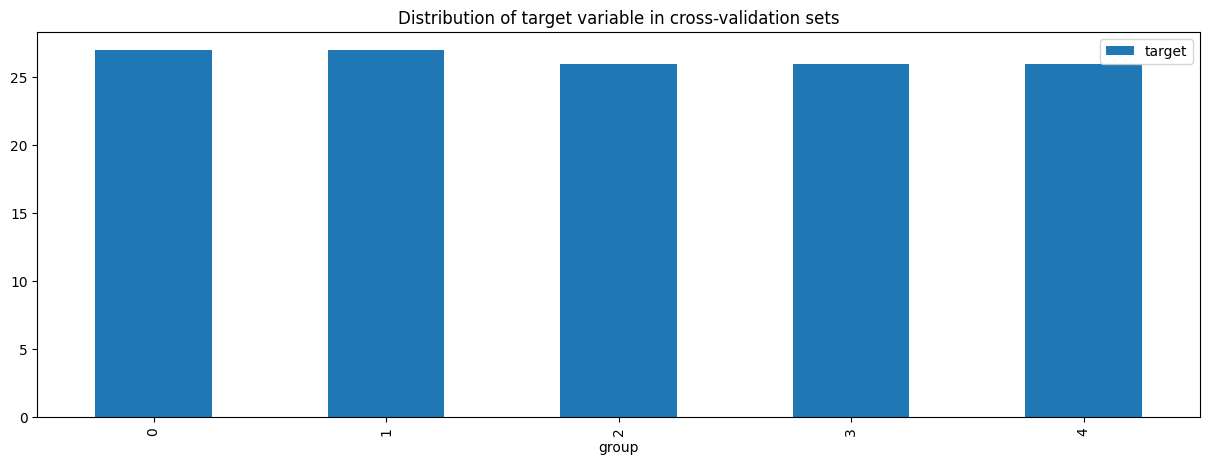

In [95]:
df_train['group target'.split()].groupby('group').sum().plot(kind='bar', figsize=(15, 5), title='Distribution of target variable in cross-validation sets');

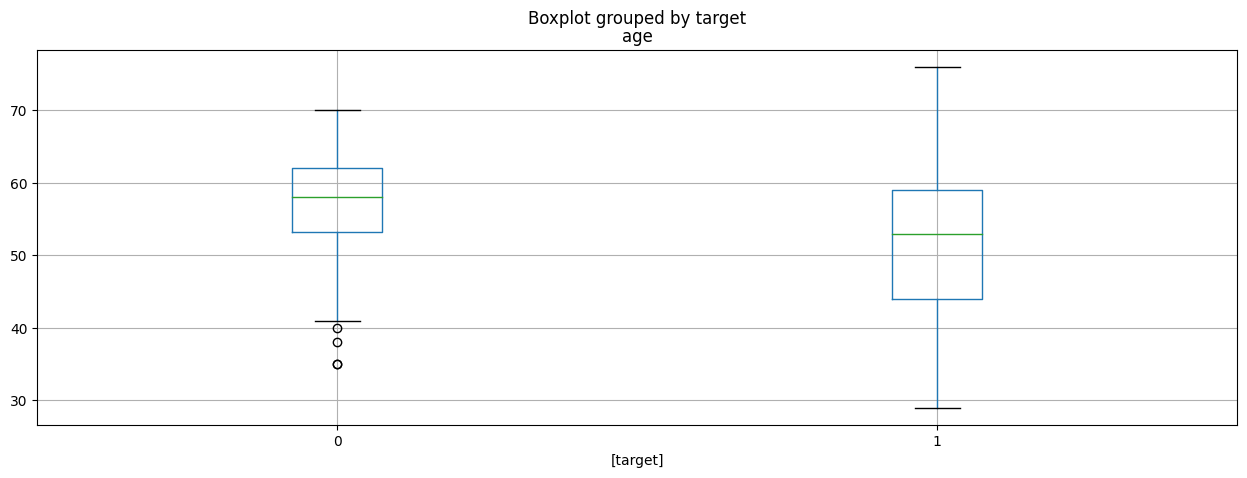

In [96]:
# plot boxplots by target and feature
def boxplot_tgt(feature, target='target', df=df_train, figsize=(15, 5)):
    df[[feature, target]].boxplot(by=target, figsize=figsize);
boxplot_tgt('age')

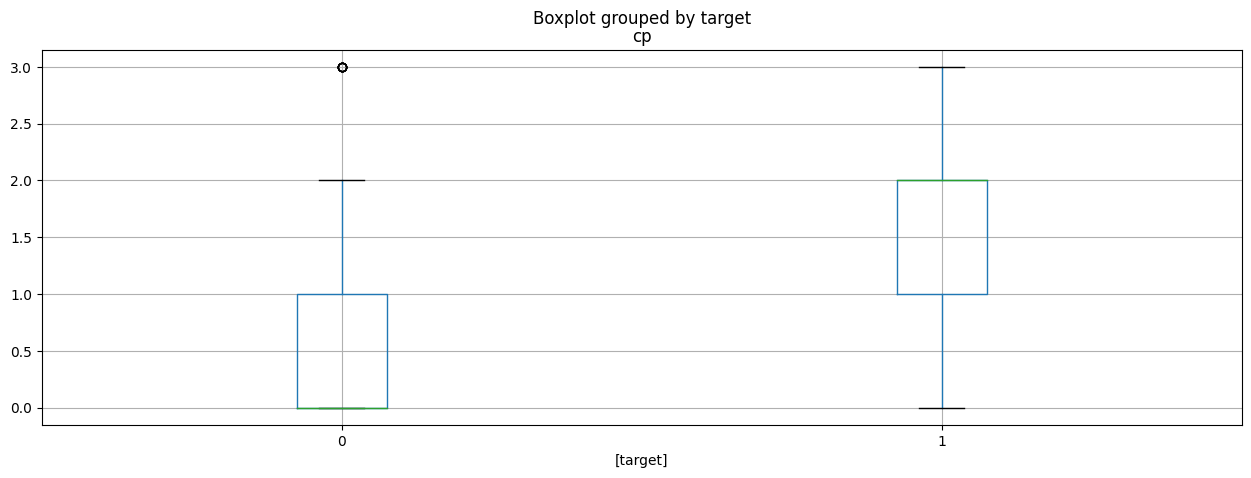

In [97]:
boxplot_tgt('cp')

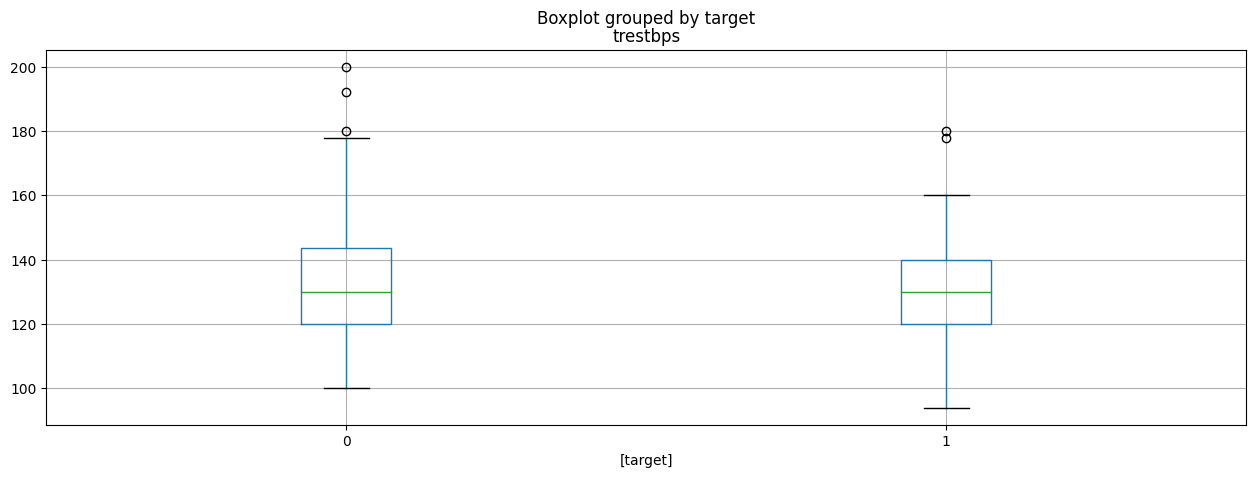

In [98]:
boxplot_tgt('trestbps')

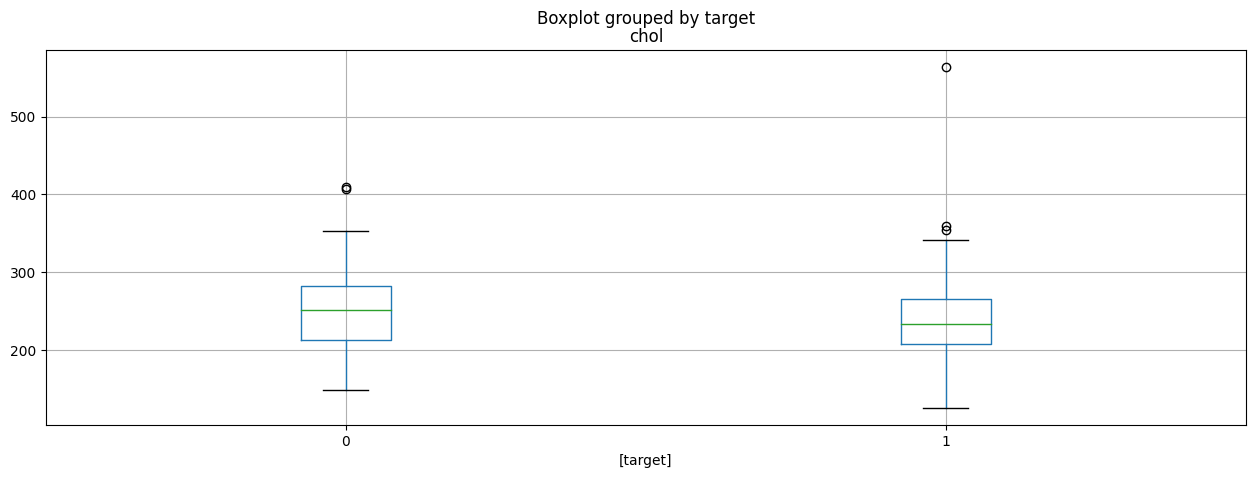

In [99]:
boxplot_tgt('chol')

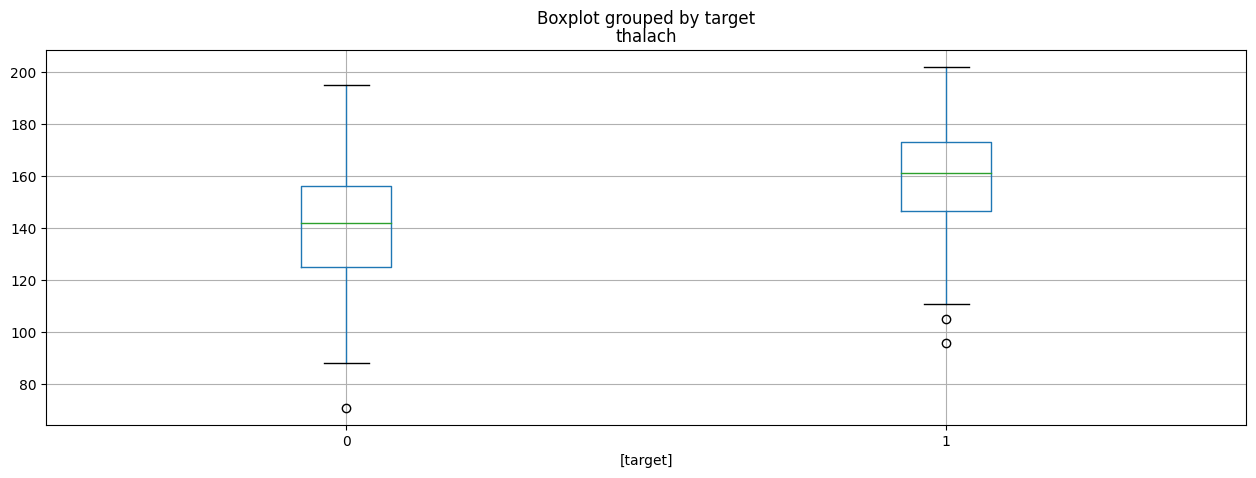

In [100]:
boxplot_tgt('thalach')

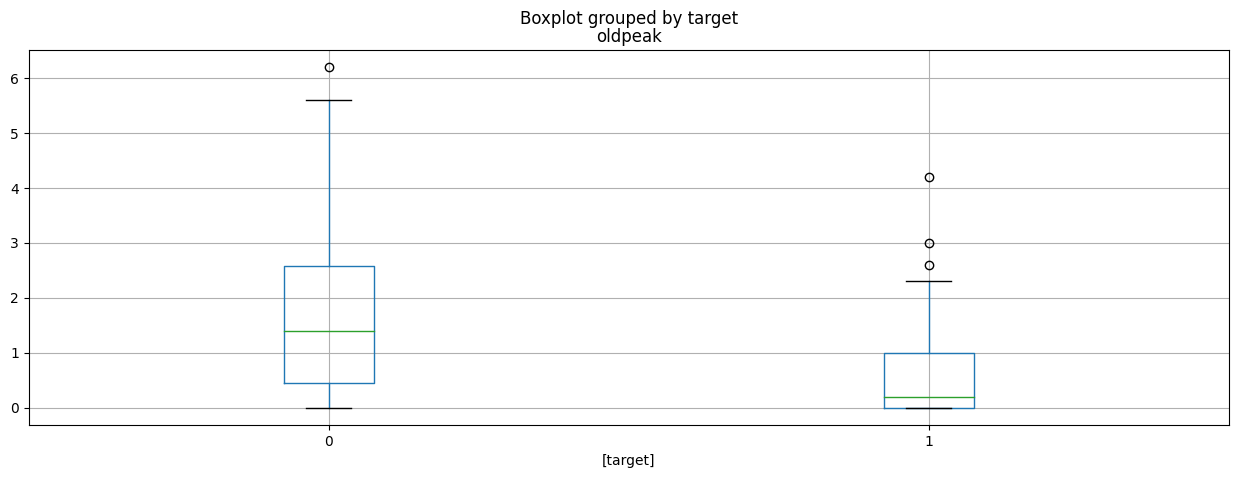

In [101]:
boxplot_tgt('oldpeak')

In [129]:
# confusion matrix
def confusion_matrix(feature, target='target', df=df_train):
    from sklearn.linear_model import LogisticRegression
    X = df[[feature]]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    lm = LogisticRegression().fit(X_train, y_train)
    y_pred = pd.Series(lm.predict(X_test))
    return pd.DataFrame(confusion_matrix(y_test, y_pred), index=['actual_0', 'actual_1'], columns=['pred_0', 'pred_1'])

In [130]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,group,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,3,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0,0
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,3,0
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,0,1


In [131]:
confusion_matrix('sex')

KeyError: "None of [Index([(1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1)], dtype='object')] are in the [columns]"